# Feature exploration - Height
The following is part of an initial manual effort of exploration of some of the questions in the survey for use as features in the classifier. The questionaire turned out to have 2 questions that addressed people's height. One asking their height and the second actually meassuring it. The idea was that we could try and see how honest people were about their responses. Idea being that this meassure of honesty, could be used as a feature.

The following results were not included into the used feature set from the manually selected ones. But as the question of peoples honesty in their answers, seemed intersting, this manual exploration was left as part of the project. To show how during the exploration phase, one can find unexpected aspects to the dataset.

#### Import the neccessary libraries and the dataframe

In [2]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Suppress warning about mixed data types in columns (change this later?)
import warnings
warnings.filterwarnings('ignore')

# Import Some of the useful defined functions
import useful_fun as uf
# object with different useful regions defined
regions = uf.Regions()

In [3]:
# Extract the the zipped csv data if it already hasn't been extracted 
import os.path
import zipfile

if not os.path.isfile('./data/LiTS_III_2016.csv'):
    with zipfile.ZipFile("./data/LiTS_III_2016.zip","r") as zip_ref:
        zip_ref.extractall("./data/")
else:
    print('File already present')

File already present


In [4]:
# Reading the dataframe
lits_2016_full = pd.read_csv('./data/LiTS_III_2016.csv') # data in the repo folder linux
# lits_2016 = pd.read_csv('LiTS III.csv')

**Question 903 - State of health**  
* 1 - Very Good  
* 5 - Very Bad  

**Question 903 - Height Stated**  
* -97 - Don't know  
* -99 - Refusal  

**Question 927 - Height Meassured**  
* -99 - Refusal  
* -98 - Not applicable

In [5]:
# Select only the columns we're interested in.
good_cols = ['country', 'age_pr', 'gender_pr', 'weight_sample', 'weight_one', 'q901', 'q903','q927']
lits_2016_selected = lits_2016_full[good_cols]
# Give the columns new names
good_names = ['Country', 'Age', 'Gender', 'Weight Sample', 'Weight 1', 'State of Health', 'Stated Height', 'Meassured Height']
lits_2016_selected.columns = good_names # set the column names
lits_2016_selected.head()

,Country,Age,Gender,Weight Sample,Weight 1,State of Health,Stated Height,Meassured Height
0,Albania,47,2,0.65471,0.000436,4.0,-97.0,-98.0
1,Albania,58,1,0.50372,0.000336,3.0,171.0,-98.0
2,Albania,40,1,1.03809,0.000692,3.0,-97.0,-98.0
3,Albania,58,1,0.50372,0.000336,3.0,-97.0,-98.0
4,Albania,28,2,0.67950,0.000453,5.0,-99.0,-98.0


#### Check for the proportion of the necessary answers given

In [6]:
stated_height_excluded = [np.nan,-97, -99]
meassured_height_excluded = [np.nan,-98, -99]

# Remove the rows that can't be used.
lits_2016_stated_height = uf.exclude_values(lits_2016_selected,['Stated Height'],stated_height_excluded)

print('The percentage of people that stated their height was: {:2.2f} % \n \n'.format((np.shape(lits_2016_stated_height)[0]/np.shape(lits_2016_full)[0]) * 100  ))

lits_2016_stated_and_meassured_height = uf.exclude_values(lits_2016_stated_height,['Meassured Height'], meassured_height_excluded)

print('The percentage of people that both stated and had their height meassured was: {:2.2f} % \n \n '.format((np.shape(lits_2016_stated_and_meassured_height)[0]/np.shape(lits_2016_full)[0]) * 100  ))

print('The number of people that both stated and had their height meassured was: {} \n \n '.format((np.shape(lits_2016_stated_and_meassured_height)[0])))

The percentage of people that stated their height was: 88.83 % 
 

The percentage of people that both stated and had their height meassured was: 1.41 % 
 
 
The number of people that both stated and had their height meassured was: 724 
 
 


My original thought was to look if there's a relationship between the stated height and meassured height and if there's a discrepancy there. And if that relationship could be used as an indication of some kind of personalty trait. So that later that could be used as a feature when building a classifier for predicting answers of other questions.

As the number of people who had both their height stated and meassured is a relaively small proportion, this would not be a suitable feature for a classifier.  

As the total number of people with both meassurements is still significant, let's still investigate, if there's a relationship between stated and meassured height.

In [7]:
# Lets calculate the difference between stated and meassured height
lits_2016_stated_and_meassured_height['Difference'] = lits_2016_stated_and_meassured_height['Meassured Height'] - lits_2016_stated_and_meassured_height['Stated Height']

lits_2016_stated_and_meassured_height.head()

,Country,Age,Gender,Weight Sample,Weight 1,State of Health,Stated Height,Meassured Height,Difference
960,Albania,68,2,1.05512,0.000703,2.0,177.0,181.4,4.4
961,Albania,30,2,0.55025,0.000367,1.0,172.0,182.5,10.5
962,Albania,48,2,0.53557,0.000357,1.0,177.0,182.5,5.5
963,Albania,50,2,0.80336,0.000536,2.0,174.0,181.4,7.4
964,Albania,70,1,1.00313,0.000669,3.0,172.0,177.0,5.0


In [8]:
# Split the dataset in male and female participants to make it easier for use later
height_men = lits_2016_stated_and_meassured_height[lits_2016_stated_and_meassured_height['Gender']==1].copy()
height_women = lits_2016_stated_and_meassured_height[lits_2016_stated_and_meassured_height['Gender']==2].copy()

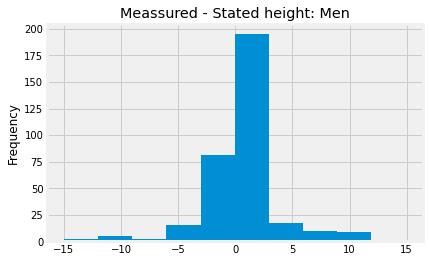

In [9]:
height_men['Difference'].plot.hist();
plt.title('Meassured - Stated height: Men');

In [10]:
height_men['Difference'].describe()

count    337.000000
mean       0.154896
std        3.265154
min      -15.000000
25%       -1.000000
50%        0.000000
75%        0.600000
max       14.900000
Name: Difference, dtype: float64

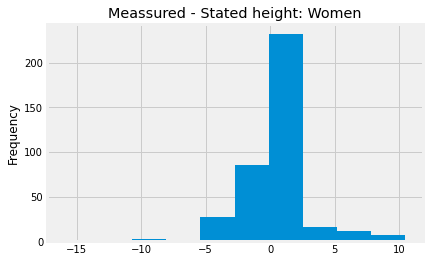

In [11]:
height_women['Difference'].plot.hist();
plt.title('Meassured - Stated height: Women');

In [12]:
height_women['Difference'].describe()

count    387.000000
mean      -0.040568
std        2.656760
min      -16.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max       10.500000
Name: Difference, dtype: float64

Above I looked at the **difference = Meassured - Stated** height for both men and women

So on average both men and women tended do describe their height close to their actual height. With men slightly understating and women overstating their height. At the same time the standard deviation of stated height difference was higher in men.

### Now Lets look at how the differences of heights stated varries with height.

In [13]:
from scipy.stats import linregress

### Men

Correlation for the difference of the stated height to meassured height: 0.3730 
 

Mean height: 175.55, difference > 0 (people understating their height on average) at 174.45


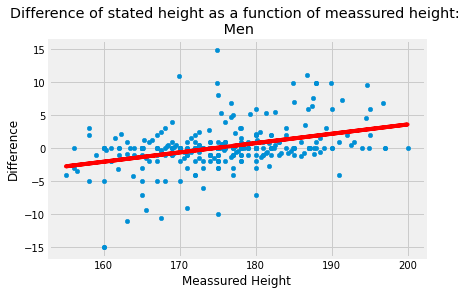

In [14]:
# Plot
height_men.plot.scatter('Meassured Height','Difference');
plt.title('Difference of stated height as a function of meassured height: \n Men')

# Calculate the correlation
correlation = np.corrcoef(height_men['Meassured Height'], height_men['Difference'])[1,0]
print('Correlation for the difference of the stated height to meassured height: {:2.4f} \n \n'.format(correlation))

# Fit a line 
linreg = linregress(height_men['Meassured Height'], height_men['Difference'])

plt.plot(height_men['Meassured Height'], linreg.intercept+linreg.slope*height_men['Meassured Height'],c='r');

mean_height = height_men['Meassured Height'].mean()
print('Mean height: {:2.2f}, difference > 0 (people understating their height on average) at {:2.2f}'.format(mean_height, abs(linreg.intercept/linreg.slope)))


### Women

Correlation for the difference of the stated height to meassured height: 0.3209 
 

Mean height: 165.63, difference > 0 (people understating their height on average) at 166.01


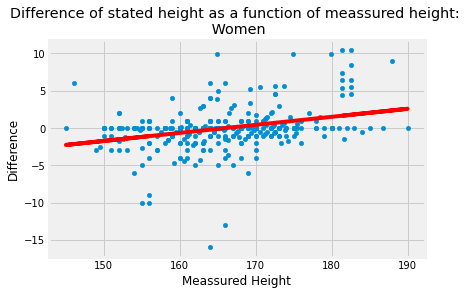

In [15]:
# Plot
height_women.plot.scatter('Meassured Height','Difference');
plt.title('Difference of stated height as a function of meassured height: \n Women')

# Calculate correlation
correlation = np.corrcoef(height_women['Meassured Height'], height_women['Difference'])[1,0]
print('Correlation for the difference of the stated height to meassured height: {:2.4f} \n \n'.format(correlation))

# Fit a line 
linreg = linregress(height_women['Meassured Height'], height_women['Difference'])

plt.plot(height_women['Meassured Height'], linreg.intercept+linreg.slope*height_women['Meassured Height'],c='r');

mean_height = height_women['Meassured Height'].mean()
print('Mean height: {:2.2f}, difference > 0 (people understating their height on average) at {:2.2f}'.format(mean_height, abs(linreg.intercept/linreg.slope)))

Above the graphs showing the difference of the height stated to height meassured, seems to indicate the general notion, that there is a proportion of shorter people that overstate their height and a proportion of taller people that understate their height. Again for men this correlation seems to be slightly stronger than for women.  

Something interesing that I notice is that the points for when people tend to go from overstating to understaing are around 170cm for women and 180cm for men.

What if we remove people who's stated height matches meassured height, with the margin of error of 1 cm. 

### Men

Correlation for the difference of the stated height to meassured height: 0.5552 
 

Proportion of men who over or under estimated their height 0.3442 
 

Mean height: 175.34, difference > 0 (people understating their height on average) at 173.56


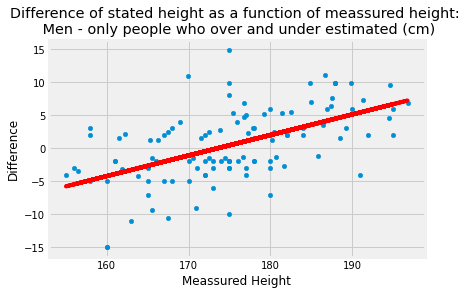

In [16]:
# Adjusting for beople who's answer was close to the messurement.
height_men_error_adjusted = height_men[height_men['Difference'].abs()>1].copy()

# Plot
height_men_error_adjusted.plot.scatter('Meassured Height','Difference');
plt.title('Difference of stated height as a function of meassured height: \n Men - only people who over and under estimated (cm)')

# Calculate corralation
correlation = np.corrcoef(height_men_error_adjusted['Meassured Height'], height_men_error_adjusted['Difference'])[1,0]
print('Correlation for the difference of the stated height to meassured height: {:2.4f} \n \n'.format(correlation))
print('Proportion of men who over or under estimated their height {:2.4} \n \n'.format(height_men_error_adjusted.shape[0]/height_men.shape[0]))

# Fit a line 
linreg = linregress(height_men_error_adjusted['Meassured Height'], height_men_error_adjusted['Difference'])

plt.plot(height_men_error_adjusted['Meassured Height'], linreg.intercept+linreg.slope*height_men_error_adjusted['Meassured Height'],c='r');

mean_height = height_men_error_adjusted['Meassured Height'].mean()
print('Mean height: {:2.2f}, difference > 0 (people understating their height on average) at {:2.2f}'.format(mean_height, abs(linreg.intercept/linreg.slope)))

### Women

Correlation for the difference of the stated height to meassured height: 0.5402 
 

Proportion of women who over or under estimated their height 0.2997 
 

Mean height: 165.65, difference > 0 (people understating their height on average) at 165.86


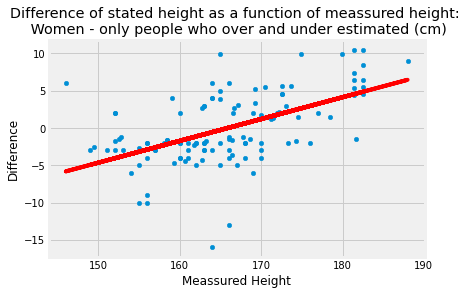

In [17]:
# Adjusting for beople who's answer was close to the messurement.
height_women_error_adjusted = height_women[height_women['Difference'].abs()>1].copy()

# Plot
height_women_error_adjusted.plot.scatter('Meassured Height','Difference');
plt.title('Difference of stated height as a function of meassured height: \n Women - only people who over and under estimated (cm)')

# Calculate corralation
correlation = np.corrcoef(height_women_error_adjusted['Meassured Height'], height_women_error_adjusted['Difference'])[1,0]
print('Correlation for the difference of the stated height to meassured height: {:2.4f} \n \n'.format(correlation))
print('Proportion of women who over or under estimated their height {:2.4} \n \n'.format(height_women_error_adjusted.shape[0]/height_women.shape[0]))


# Fit a line 
linreg = linregress(height_women_error_adjusted['Meassured Height'], height_women_error_adjusted['Difference'])

plt.plot(height_women_error_adjusted['Meassured Height'], linreg.intercept+linreg.slope*height_women_error_adjusted['Meassured Height'],c='r')

mean_height = height_women_error_adjusted['Meassured Height'].mean()
print('Mean height: {:2.2f}, difference > 0 (people understating their height on average) at {:2.2f}'.format(mean_height, abs(linreg.intercept/linreg.slope)))

As a mattter of curiosity, we grouped countries, stated, meassured and average difference, to see which had the biggest difference.

In [18]:
by_country_men = height_men.groupby('Country')
height_country_means = by_country_men.mean()
height_country_means[['Age','Stated Height','Meassured Height','Difference']].sort_values('Difference',ascending=False)

,Age,Stated Height,Meassured Height,Difference
Country,,,,
Albania,61.500000,179.875000,186.212500,6.337500
Russia,47.405405,175.443243,177.970270,2.527027
Bosnia and Herz.,30.100000,178.910000,180.720000,1.810000
Tajikistan,30.111111,175.111111,176.655556,1.544444
Bulgaria,47.222222,176.944444,177.777778,0.833333
Hungary,56.285714,173.428571,174.000000,0.571429
Greece,36.400000,176.200000,176.740000,0.540000
Azerbaijan,39.000000,165.500000,166.000000,0.500000
Slovenia,57.583333,171.216667,171.650000,0.433333


### Conclussion

There are results in literature stating that people don't tend to iverestimate their height. 

(Burke, M. A., & Carman, K. G. (2017). You can be too thin (but not too tall): Social desirability bias in self-reports of weight and height. Economics & Human Biology, 27, 198-222)

Yet in our results, we also found people understating their height, which would be an intersing question for further investigation.

When you have such large datasets as this survey, there are so many questions that you do not expect. It's quite easy to get carried away with new questions, that don't necessarily have much of a connection with the original goal in mind.